In [86]:
from generate_questions import *
from pprint import pprint

def shuffle(queries):
    out = []
    for j in range(4):
        for i in range(len(queries)//4):
            out += [queries[(i*4 + j) % (len(queries) - 0)]]
    return out

np.random.seed(30)
queries = generate_random_queries(num_questions=192)
print(len(queries))
queries = shuffle(queries)

#pprint(queries)
u = []
print(len(queries))
for q in queries:
    if q not in u:
        u += [q]
print(len(u), len(queries))

for i, q in enumerate(queries):
    props = [find_properties(n) for n in q]
    queries[i] = q + props
parts = [queries[len(queries)*i//4:len(queries)*(i+1)//4]
         for i in range(4)]

import pandas as pd
for i, part in enumerate(parts):
    csv = pd.DataFrame(part, columns=['top', 'left', 'right', 'top props', 'left props', 'right props'])
    csv.to_csv('e-prime/part{i}.csv'.format(i=i))


192
192
173 192


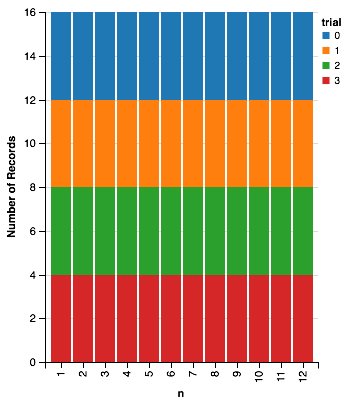

In [89]:
df = [{'n': q[0], 'trial': str(i)}
     for i, part in enumerate(parts)
     for q in part]

df = pd.DataFrame(df)
import altair
c = altair.Chart(df).mark_bar().encode(
        x='n:N',
        y='count(n)',
        color='trial'
)
#print("Numberof times a number appears in 4 different trials")
c